In [ ]:
# Common imports
import numpy as np
import os
import seaborn as sns
from scipy import stats
import missingno as msno

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')
import plotly.express as px

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/jpzambranoleon/ML_Projects/master/" 
TRAIN_PATH = os.path.join("datasets", "adult")
TRAIN_URL = DOWNLOAD_ROOT + "datasets/adult.csv"

TEST_PATH = os.path.join("datasets", "adult_test")
TEST_URL = DOWNLOAD_ROOT + "datasets/adult_test.csv"

def fetch_train_data(train_url=TRAIN_URL, train_path=TRAIN_PATH):
  os.makedirs(train_path, exist_ok=True)
  csv_path = os.path.join(train_path, "adult.csv")
  urllib.request.urlretrieve(train_url, csv_path)

def fetch_test_data(test_url=TEST_URL, test_path=TEST_PATH):
  os.makedirs(test_path, exist_ok=True)
  csv_path = os.path.join(test_path, "adult_test.csv")
  urllib.request.urlretrieve(test_url, csv_path)

In [ ]:
fetch_train_data()
fetch_test_data()

In [ ]:
import pandas as pd

def load_train_data(train_path=TRAIN_PATH):
  csv_path = os.path.join(train_path, "adult.csv")
  return pd.read_csv(csv_path)

def load_test_data(test_path=TEST_PATH):
  csv_path = os.path.join(test_path, "adult_test.csv")
  return pd.read_csv(csv_path)

In [ ]:
train_df = load_train_data()
test_df = load_test_data()

In [ ]:
train_df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train_df.shape

(32561, 15)

In [ ]:
def replace(DATA):
  return DATA.replace([' ?'], np.nan)

In [ ]:
train_df = replace(train_df)
test_df = replace(test_df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
train_df.isna().any()

Age               False
Workclass          True
Fnlwgt            False
Education         False
Education-num     False
Marital-status    False
Occupation         True
Relationship      False
Race              False
Sex               False
Capital-gain      False
Capital-loss      False
Hours-per-week    False
Native-country     True
Target            False
dtype: bool

In [ ]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [ ]:
train_df.isna().any()
#test_df.isna().any()

Age               False
Workclass         False
Fnlwgt            False
Education         False
Education-num     False
Marital-status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital-gain      False
Capital-loss      False
Hours-per-week    False
Native-country    False
Target            False
dtype: bool

In [ ]:
train_df.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


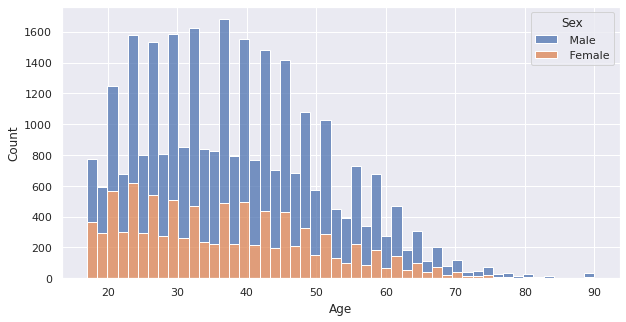

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x='Age', bins=50, hue='Sex', multiple='stack')
plt.show()

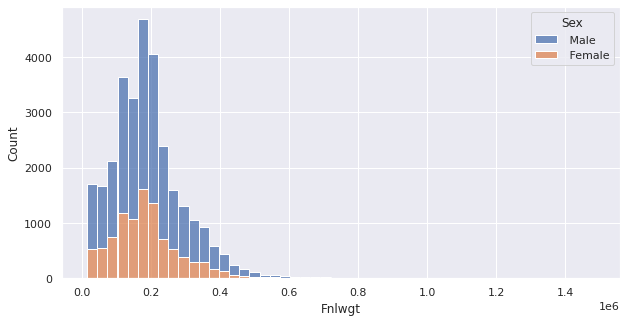

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x='Fnlwgt', bins=50, hue='Sex', multiple='stack')
plt.show()

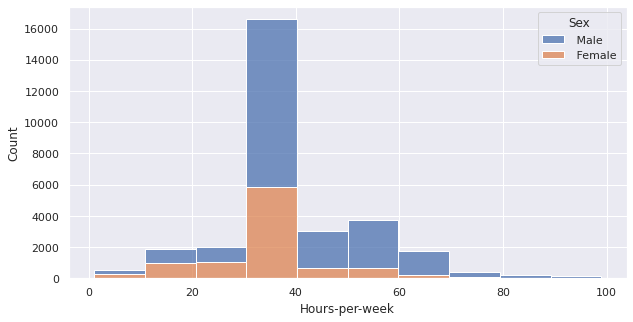

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x='Hours-per-week', bins=10, hue='Sex', multiple='stack')
plt.show()

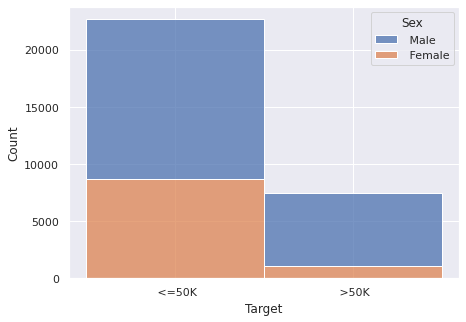

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=train_df, x='Target', hue='Sex', multiple='stack')
plt.show()

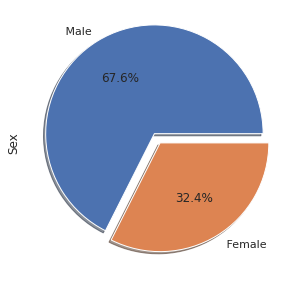

In [ ]:
plt.figure(figsize=(5,5))
train_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=(0.1,0))
plt.show()

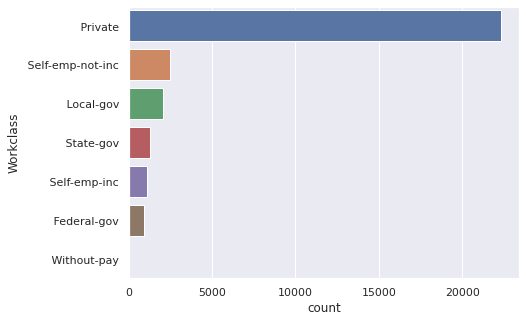

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(y='Workclass', data=train_df, order=train_df['Workclass'].value_counts().index)
plt.show()

In [ ]:
train_df['Workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64

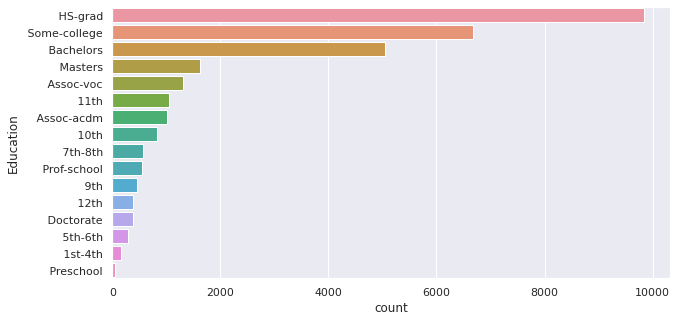

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='Education', data=train_df, order=train_df['Education'].value_counts().index)
plt.show()

In [ ]:
train_df['Education'].value_counts()

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: Education, dtype: int64

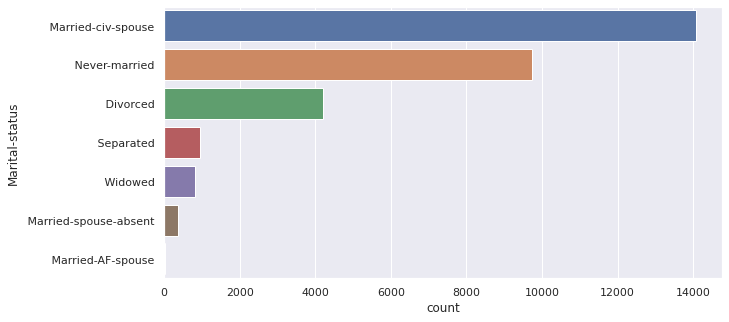

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='Marital-status', data=train_df, order=train_df['Marital-status'].value_counts().index)
plt.show()

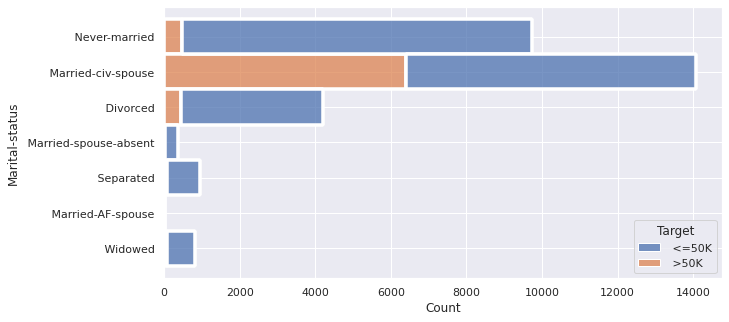

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(y='Marital-status', data=train_df, hue='Target', multiple='stack')
plt.show()

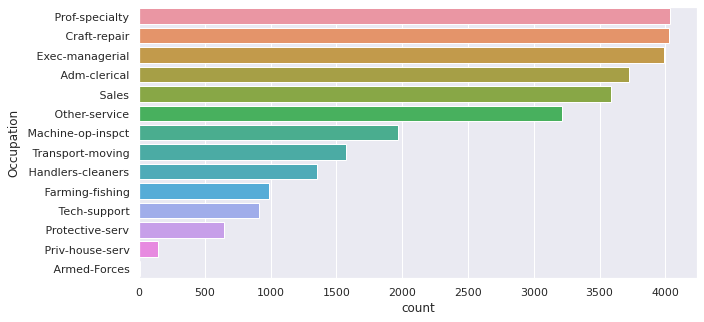

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='Occupation', data=train_df, order=train_df['Occupation'].value_counts().index)
plt.show()

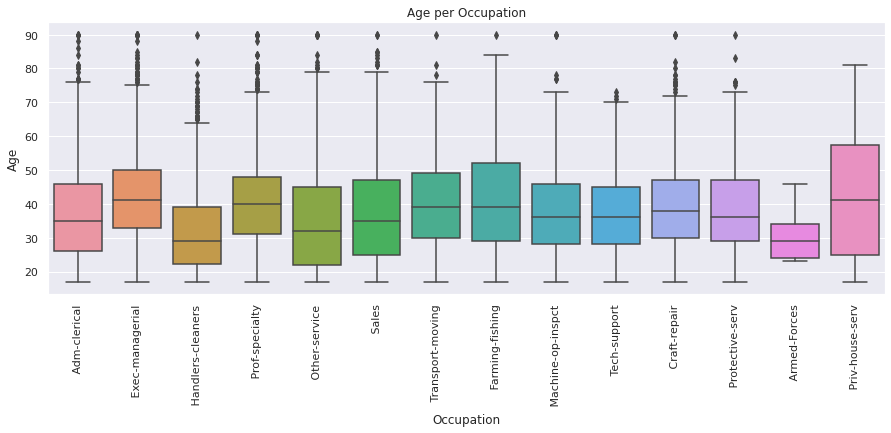

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Occupation',y='Age',data = train_df)
plt.xticks(rotation=90)
plt.title('Age per Occupation')
plt.show()

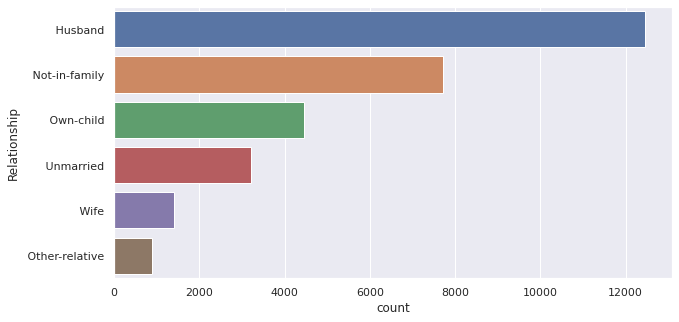

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='Relationship', data=train_df, order=train_df['Relationship'].value_counts().index)
plt.show()

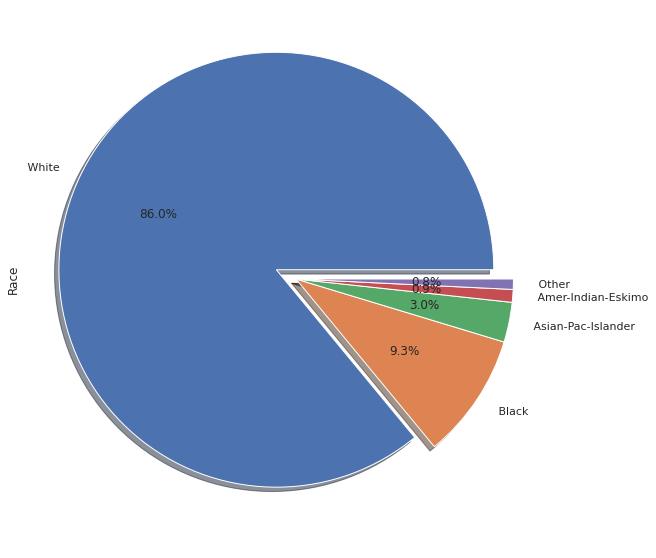

In [ ]:
plt.figure(figsize=(10,10))
train_df['Race'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=(0.1, 0, 0, 0, 0))
plt.show()

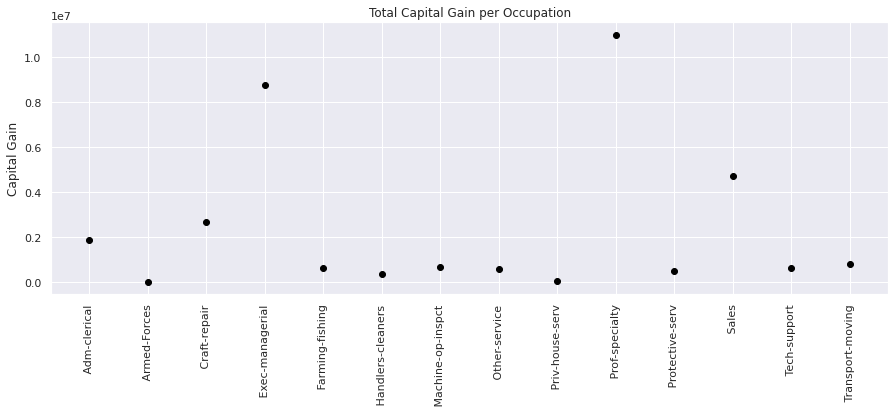

In [ ]:
piv_cat = train_df.groupby('Occupation')
x = piv_cat['Capital-gain'].agg(np.sum)

plt.figure(figsize=(15,5))
plt.plot(x, 'ro', color='black')
plt.xticks(rotation=90)
plt.ylabel("Capital Gain")
plt.title("Total Capital Gain per Occupation")
plt.show()

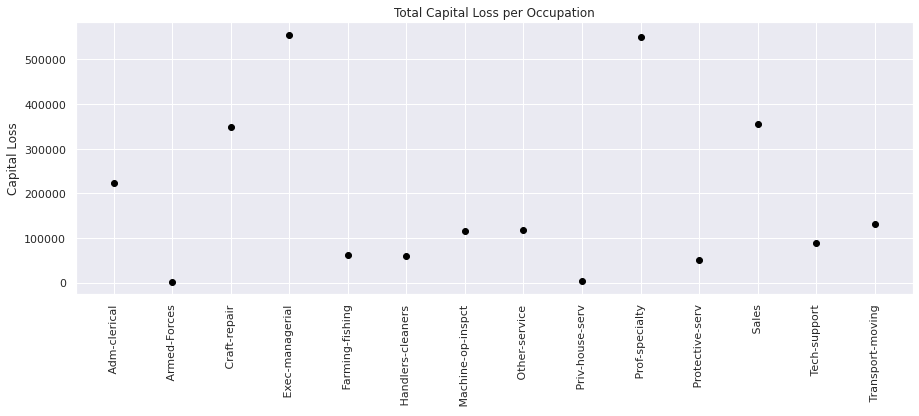

In [ ]:
piv_cat = train_df.groupby('Occupation')
x = piv_cat['Capital-loss'].agg(np.sum)

plt.figure(figsize=(15,5))
plt.plot(x, 'ro', color='black')
plt.xticks(rotation=90)
plt.ylabel("Capital Loss")
plt.title("Total Capital Loss per Occupation")
plt.show()

In [ ]:
train_df['Native-country'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

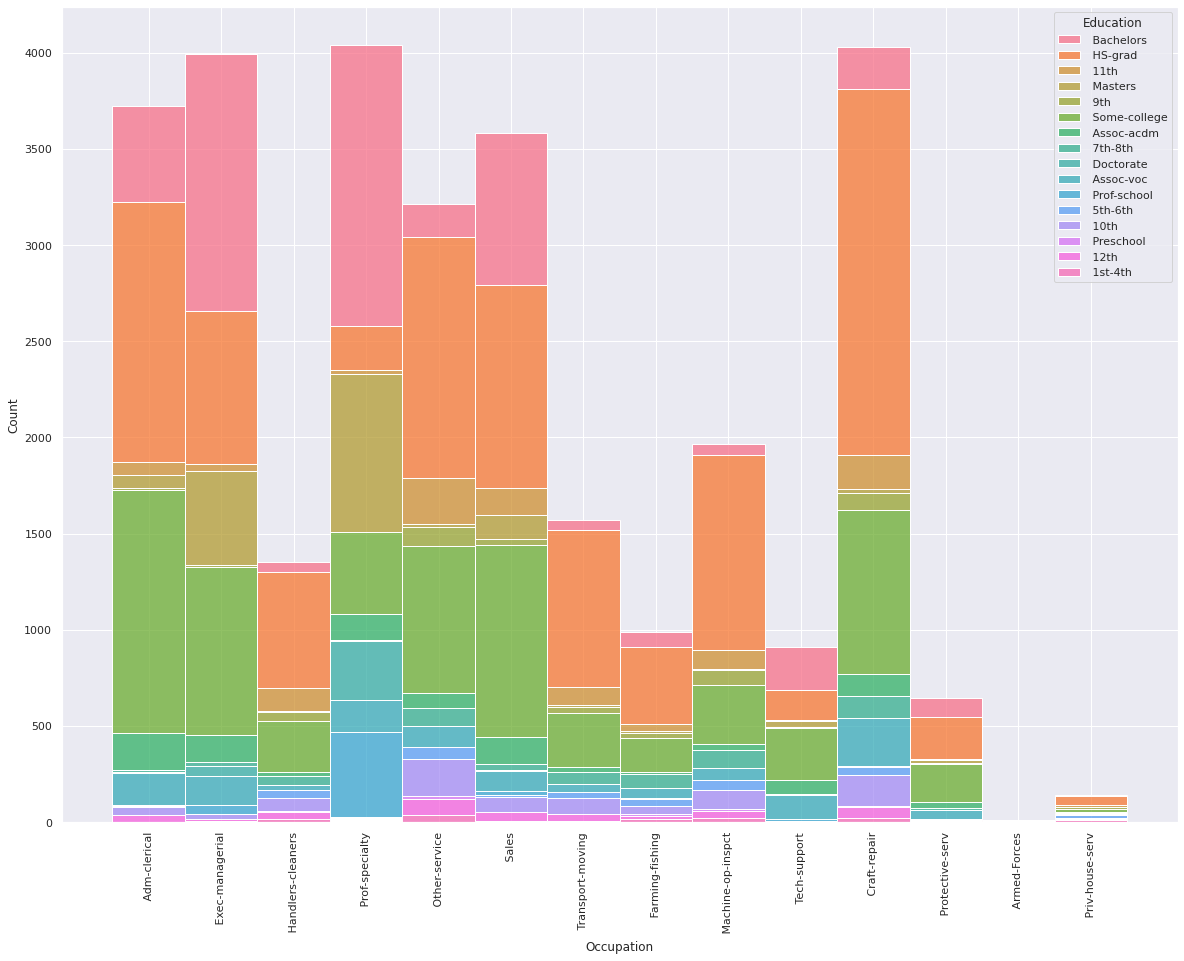

In [ ]:
plt.figure(figsize=(20,15))
sns.histplot(data=train_df, x='Occupation', hue='Education', multiple='stack')
plt.xticks(rotation=90)
plt.show()

In [ ]:
dummies = pd.get_dummies(train_df.Target)
#dummies.head()
train_df = pd.concat([train_df, dummies], axis=1)

In [ ]:
train_df = train_df.rename(columns={" >50K": "Above 50K"})

In [ ]:
train_df.head()

In [ ]:
train_label = train_df['Above 50K'].copy()
train_df = train_df.drop(['Education', 'Native-country', 'Target', ' <=50K', 'Above 50K'], axis=1)
train_df.head()

In [ ]:
dummies = pd.get_dummies(test_df.Target)
test_set = pd.concat([test_df, dummies], axis=1)

In [ ]:
test_set = test_set.rename(columns={" >50K.":"Above 50K"})

In [ ]:
X_test = test_set.drop(['Education', 'Native-country', 'Target', ' <=50K.', 'Above 50K'], axis=1)
y_test = test_set['Above 50K'].copy()

In [ ]:
train_num = train_df[['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']]

In [ ]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(train_num)
cat_attribs = ['Workclass', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex']


pipeline_1 = ColumnTransformer([                          
     ("cat", OneHotEncoder(), cat_attribs)                          
])

training_prepared_1 = pipeline_1.fit_transform(train_df)

In [ ]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())                
])

full_pipeline = ColumnTransformer([
         ("num", num_pipeline, num_attribs),
         ("cat", OneHotEncoder(), cat_attribs)                          
])

training_prepared_2 = full_pipeline.fit_transform(train_df)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

sgd_clf = SGDClassifier(random_state=42)
log_reg = LogisticRegression()
nb_clf = GaussianNB()
forest_clf = RandomForestClassifier()
svm_clf = SVC()
xgb_clf = XGBClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def scores(model, x, y, CV):
  model.fit(x, y)
  cross_val_mean = cross_val_score(model, x, y, cv=CV).mean()
  print("Cross Validation Mean Score:", cross_val_mean)
  y_pred = cross_val_predict(model, x, y, cv=CV)
  cf_matrix = confusion_matrix(y, y_pred)
  print("Confusion Matrix:", cf_matrix)
  print("Precision Score:", precision_score(y, y_pred))
  print("Recall Score:", recall_score(y, y_pred))
  F1_score = f1_score(y, y_pred)
  print("f1 score:", F1_score)

In [ ]:
scores(sgd_clf, training_prepared_1, train_label, 3)

In [ ]:
scores(log_reg, training_prepared_1, train_label, 3)

In [ ]:
scores(forest_clf, training_prepared_1, train_label, 3)

In [ ]:
scores(svm_clf, training_prepared_1, train_label, 3)

In [ ]:
scores(xgb_clf, training_prepared_1, train_label, 3)

In [ ]:
scores(sgd_clf, training_prepared_2, train_label, 3)

In [ ]:
scores(log_reg, training_prepared_2, train_label, 3)

In [ ]:
scores(forest_clf, training_prepared_2, train_label, 3)

In [ ]:
scores(svm_clf, training_prepared_2, train_label, 3)

In [ ]:
scores(xgb_clf, training_prepared_2, train_label, 3)

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
final_model = forest_clf

In [ ]:
final_predictions = final_model.predict(X_test_prepared)

final_matrix = confusion_matrix(y_test.tolist(), final_predictions.tolist())
final_matrix

In [ ]:
precision_score(y_test, final_predictions)

In [ ]:
recall_score(y_test, final_predictions)

In [ ]:
f1_score(y_test, final_predictions)